<a href="https://colab.research.google.com/github/Daryldactyl/First_Reinforcement_Learning/blob/main/Upper_Confidence_Bound_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
#Dataset is a simulation of an Ad campaign with 1 showing a user clicked and 0 shows they did not click on the Ad
df = pd.read_csv("https://raw.githubusercontent.com/Daryldactyl/First_Reinforcement_Learning/Files/Ads_CTR_Optimisation.csv")

In [5]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing UCB

In [20]:
import math
#N represents the number of participants and d represents the number of Ads
N =10000
d =10
ads_selected = []
nums_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0

In [22]:
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (nums_of_selections[i] > 0):
      average_reward = sum_of_rewards[i] / nums_of_selections[i]
      conf_interval = math.sqrt(3/2 * math.log(n+1) / nums_of_selections[i])
      upper_bound = average_reward + conf_interval
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  nums_of_selections[ad] += 1
  reward = df.values[n, ad]
  sum_of_rewards[ad] = sum_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

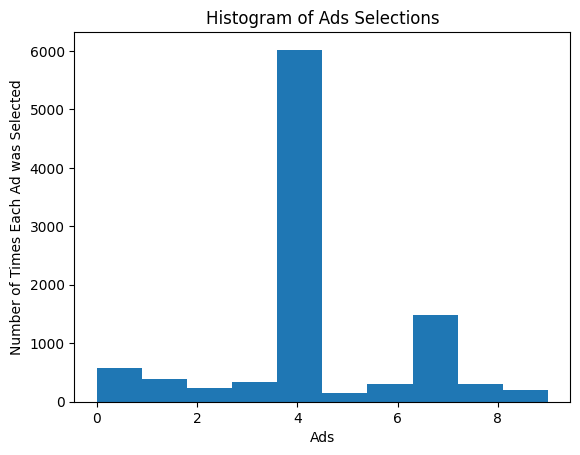

In [24]:
plt.hist(ads_selected)
plt.title("Histogram of Ads Selections")
plt.xlabel("Ads")
plt.ylabel("Number of Times Each Ad was Selected")
plt.show()